In [8]:
import torch
import random
import pandas as pd
import math
import matplotlib.pyplot as plt
import csv

In [26]:
# Dataset config
NUM_ENCODE_TIME_STEPS = 5
NUM_DECODE_TIME_STEPS = 5

DATA_TYPE = "linear"

In [31]:
# Makeup data tensor

temp_tensor = torch.empty(20000)


if DATA_TYPE == "polynomial":
    temp_tensor[0] = 1
    for i in range(1, 20000):
        temp_tensor[i] = temp_tensor[i-1] * 1.0001
elif DATA_TYPE == "linear":
    for i in range(20000):
        temp_tensor[i] = 3 + i
elif DATA_TYPE == "sin":
    for i in range(20000):
        temp_tensor[i] = math.sin(i / 100) + 1
else:
    raise(NotImplementedError)

print(temp_tensor)


tensor([3.0000e+00, 4.0000e+00, 5.0000e+00,  ..., 2.0000e+04, 2.0001e+04,
        2.0002e+04])


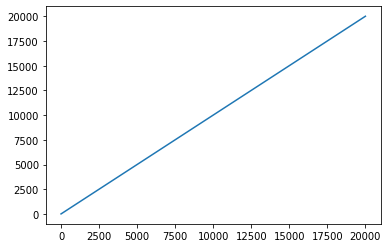

In [32]:
plt_time = list(range(len(temp_tensor)))
plt.plot(plt_time, temp_tensor, label="Temperature")

In [33]:
# Make input time serie data and target time serie data tensor 
X_shape = (temp_tensor.shape[0] - NUM_ENCODE_TIME_STEPS - NUM_DECODE_TIME_STEPS, NUM_ENCODE_TIME_STEPS)
y_shape = (temp_tensor.shape[0] - NUM_ENCODE_TIME_STEPS - NUM_DECODE_TIME_STEPS, NUM_DECODE_TIME_STEPS)

print("Encode time serie data shape:", X_shape)
print("Decode time serie data shape:", y_shape)

X = torch.empty(X_shape)
y = torch.empty(y_shape)

# Change from last time step (more numerically stable for the neural net)
for i in range(X.shape[0]):
    serie_end_i = i + NUM_ENCODE_TIME_STEPS + NUM_DECODE_TIME_STEPS
    time_serie = (temp_tensor[i+1:serie_end_i+1] - temp_tensor[i:serie_end_i]) / temp_tensor[i:serie_end_i]
    X[i] = time_serie[:NUM_ENCODE_TIME_STEPS]
    y[i] = time_serie[NUM_ENCODE_TIME_STEPS:]

print("Training X:\n", X)
print("Training y:\n", y)

Encode time serie data shape: (19990, 5)
Decode time serie data shape: (19990, 5)
Training X:
 tensor([[3.3333e-01, 2.5000e-01, 2.0000e-01, 1.6667e-01, 1.4286e-01],
        [2.5000e-01, 2.0000e-01, 1.6667e-01, 1.4286e-01, 1.2500e-01],
        [2.0000e-01, 1.6667e-01, 1.4286e-01, 1.2500e-01, 1.1111e-01],
        ...,
        [5.0025e-05, 5.0023e-05, 5.0020e-05, 5.0018e-05, 5.0015e-05],
        [5.0023e-05, 5.0020e-05, 5.0018e-05, 5.0015e-05, 5.0013e-05],
        [5.0020e-05, 5.0018e-05, 5.0015e-05, 5.0013e-05, 5.0010e-05]])
Training y:
 tensor([[1.2500e-01, 1.1111e-01, 1.0000e-01, 9.0909e-02, 8.3333e-02],
        [1.1111e-01, 1.0000e-01, 9.0909e-02, 8.3333e-02, 7.6923e-02],
        [1.0000e-01, 9.0909e-02, 8.3333e-02, 7.6923e-02, 7.1429e-02],
        ...,
        [5.0013e-05, 5.0010e-05, 5.0008e-05, 5.0005e-05, 5.0003e-05],
        [5.0010e-05, 5.0008e-05, 5.0005e-05, 5.0003e-05, 5.0000e-05],
        [5.0008e-05, 5.0005e-05, 5.0003e-05, 5.0000e-05, 4.9997e-05]])


In [34]:
torch.save(X, "./../X.pt")
torch.save(y, "./../y.pt")

In [35]:
X = torch.load("./../X.pt")
y = torch.load("./../y.pt")
print(X)
print(y)

tensor([[3.3333e-01, 2.5000e-01, 2.0000e-01, 1.6667e-01, 1.4286e-01],
        [2.5000e-01, 2.0000e-01, 1.6667e-01, 1.4286e-01, 1.2500e-01],
        [2.0000e-01, 1.6667e-01, 1.4286e-01, 1.2500e-01, 1.1111e-01],
        ...,
        [5.0025e-05, 5.0023e-05, 5.0020e-05, 5.0018e-05, 5.0015e-05],
        [5.0023e-05, 5.0020e-05, 5.0018e-05, 5.0015e-05, 5.0013e-05],
        [5.0020e-05, 5.0018e-05, 5.0015e-05, 5.0013e-05, 5.0010e-05]])
tensor([[1.2500e-01, 1.1111e-01, 1.0000e-01, 9.0909e-02, 8.3333e-02],
        [1.1111e-01, 1.0000e-01, 9.0909e-02, 8.3333e-02, 7.6923e-02],
        [1.0000e-01, 9.0909e-02, 8.3333e-02, 7.6923e-02, 7.1429e-02],
        ...,
        [5.0013e-05, 5.0010e-05, 5.0008e-05, 5.0005e-05, 5.0003e-05],
        [5.0010e-05, 5.0008e-05, 5.0005e-05, 5.0003e-05, 5.0000e-05],
        [5.0008e-05, 5.0005e-05, 5.0003e-05, 5.0000e-05, 4.9997e-05]])


In [36]:
print(X.shape)
print(torch.mean(X))
print("Maximum price change", torch.max(y))
print("Minimum price change in", torch.min(y))

torch.Size([19990, 5])
tensor(0.0004)
Maximum price change tensor(0.1250)
Minimum price change in tensor(4.9997e-05)


In [37]:
# Checking for nan data
assert(torch.sum(X != X) == 0)
assert(torch.sum(y != y) == 0)